In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils.class_weight import compute_class_weight
import tensorflow as tf
from sklearn.metrics import classification_report,roc_auc_score

In [120]:
df=pd.read_csv("/content/Churn_Modelling - Churn_Modelling.csv")

In [121]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [122]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [123]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [124]:
df.dtypes

,0
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64
HasCrCard,int64
IsActiveMember,int64
EstimatedSalary,float64


In [125]:
df.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


,count
Exited,
0,7963
1,2037


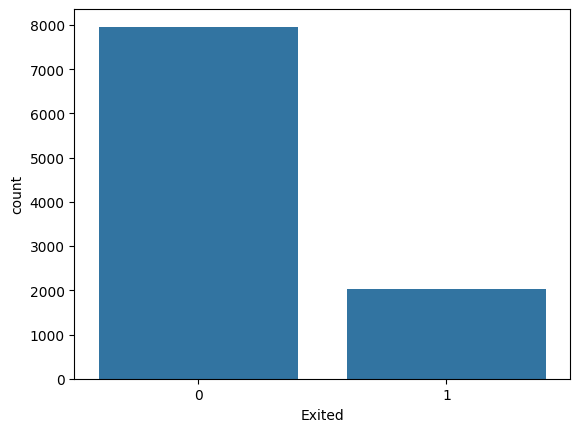

In [126]:
sns.countplot(x=df['Exited'])

df['Exited'].value_counts()

In [127]:
x=df.drop(columns=['Exited'])
y=df['Exited']

In [128]:
x=pd.get_dummies(x,columns=['Geography','Gender'])


In [129]:
x=x.astype(int)

In [130]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)

In [131]:
x_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
2151,753,57,7,0,1,1,0,159475,1,0,0,0,1
8392,739,32,3,102128,1,1,0,63981,0,1,0,0,1
5006,755,37,0,113865,2,1,1,117396,0,1,0,1,0
4117,561,37,5,0,2,1,0,83093,1,0,0,0,1
7182,692,49,6,110540,2,0,1,107472,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4555,688,35,6,0,1,1,0,25488,0,0,1,1,0
4644,712,74,5,0,2,0,0,151425,0,0,1,0,1
8942,667,37,9,71786,2,1,1,67734,1,0,0,1,0
2935,687,35,8,100988,2,1,0,22247,0,0,1,0,1


In [132]:
sc=StandardScaler()

In [133]:
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

In [134]:
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weight_dict = {0: class_weights[0], 1: class_weights[1]}

In [135]:
class_weight_dict

{0: np.float64(0.6279434850863422), 1: np.float64(2.4539877300613497)}

In [136]:
model=tf.keras.models.Sequential([
    tf.keras.layers.Dense(units=124,activation='relu',input_dim=x_train_scaled.shape[1]),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(units=64,activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(1,activation='sigmoid')
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [147]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=2.0,   # focusing parameter (default 2.0)
        alpha=0.75   # class weight balance (default None)
),metrics=['accuracy'])

In [148]:
history1 = model.fit(
    x_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test_scaled, y_test)
)


Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8638 - loss: 0.0837 - val_accuracy: 0.8640 - val_loss: 0.0906
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8761 - loss: 0.0808 - val_accuracy: 0.8640 - val_loss: 0.0904
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8766 - loss: 0.0812 - val_accuracy: 0.8675 - val_loss: 0.0897
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8713 - loss: 0.0789 - val_accuracy: 0.8555 - val_loss: 0.0909
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8735 - loss: 0.0791 - val_accuracy: 0.8660 - val_loss: 0.0909
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8747 - loss: 0.0794 - val_accuracy: 0.8625 - val_loss: 0.0917
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8730 - loss: 0.0811 - val_accuracy: 0.8575 - val_loss: 0.0925
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8745 - loss: 0.0816 - val_accuracy: 0.

In [149]:
y_pred1= (model.predict(x_test_scaled) > 0.5).astype("int32")
print("Focal Loss")
print(classification_report(y_test, y_pred1))
print("ROC-AUC:", roc_auc_score(y_test, y_pred1))


63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
Focal Loss
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1593
           1       0.77      0.45      0.57       407

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000

ROC-AUC: 0.7069519442400798


In [152]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [153]:
history2 = model.fit(
    x_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test_scaled, y_test),
    class_weight=class_weight_dict
)

y_pred2 = (model.predict(x_test_scaled) > 0.5).astype("int32")
print("Binary Crossentropy + Class Weights")
print(classification_report(y_test, y_pred2))
print("ROC-AUC:", roc_auc_score(y_test, y_pred2))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 13ms/step - accuracy: 0.8515 - loss: 0.4591 - val_accuracy: 0.8325 - val_loss: 0.4224
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.8286 - loss: 0.4247 - val_accuracy: 0.8170 - val_loss: 0.4336
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.8156 - loss: 0.4268 - val_accuracy: 0.8145 - val_loss: 0.4276
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.8231 - loss: 0.4182 - val_accuracy: 0.8110 - val_loss: 0.4399
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.8251 - loss: 0.4031 - val_accuracy: 0.8080 - val_loss: 0.4397
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8166 - loss: 0.4106 - val_accuracy: 0.8115 - val_loss: 0.4299
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8155 - loss: 0.4224 - val_accuracy: 0.8190 - val_loss: 0.4113
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8273 - loss: 0.4174 - val_accuracy: 

In [158]:
model.compile(optimizer='adam',loss=tf.keras.losses.BinaryFocalCrossentropy(gamma=5.0,   # focusing parameter (default 2.0)
        alpha=1  # class weight balance (default None)
),metrics=['accuracy'])

In [159]:
history3= model.fit(
    x_train_scaled, y_train,
    epochs=20,
    batch_size=32,
    validation_data=(x_test_scaled, y_test),
    class_weight=class_weight_dict
)

y_pred3 = (model.predict(x_test_scaled) > 0.5).astype("int32")
print("Binary FocalCrossentropy + Class Weights")
print(classification_report(y_test, y_pred3))
print("ROC-AUC:", roc_auc_score(y_test, y_pred3))

Epoch 1/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.8270 - loss: 0.0145 - val_accuracy: 0.7755 - val_loss: 0.0168
Epoch 2/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8249 - loss: 0.0128 - val_accuracy: 0.7990 - val_loss: 0.0162
Epoch 3/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8276 - loss: 0.0132 - val_accuracy: 0.7810 - val_loss: 0.0163
Epoch 4/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8139 - loss: 0.0128 - val_accuracy: 0.8060 - val_loss: 0.0158
Epoch 5/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8197 - loss: 0.0131 - val_accuracy: 0.7980 - val_loss: 0.0155
Epoch 6/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8253 - loss: 0.0128 - val_accuracy: 0.7810 - val_loss: 0.0167
Epoch 7/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8237 - loss: 0.0126 - val_accuracy: 0.7815 - val_loss: 0.0166
Epoch 8/20
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8170 - loss: 0.0127 - val_accuracy: 0.

**Conclusion** the last i can say as my dataset is highly imbalanced i applied both binaryfocalcrossentropy and class weights to handle it and also combination of both simple binarycrossentropy with class weight and focal ones  but i got the best by appling class weights with binarycrossentropy loss function
